## 上机题1

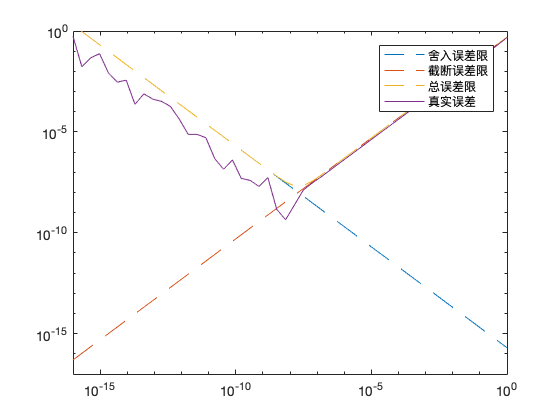

In [179]:
format long
eps=1E-16;
M=1;
h=logspace(-16,0,50);
true=cos(1);
round_err=2*eps./h;
trunc_err=M*h/2;
total_err=round_err+trunc_err;
loglog(h,round_err,'--',h,trunc_err,'--',h,total_err,'--',h,abs(true-(sin(1+h)-sin(1))./h),'-')
legend('舍入误差限','截断误差限','总误差限','真实误差')
axis([1E-16 1 1E-17 1])

从图中可以看到，截断误差和舍入误差的上限都是h的线性函数，截断误差上限随h增大而增大，舍入误差则随h增大而减小。而总误差限几乎与两个误差限较大者重合，这是很自然的，因为在非中间的区域，两个误差限差着数量级。而在中间两个误差限相等时，就出现了曲线。
真实的误差，总是接近两条线中较大者。在中间取的最小值，大概最低点出现在h=10^-8^时，理论上是$2*10^{-8}$，与理论值很接近。因为是对数图)。
我们注意到，在h<10^-8^，真实误差呈锯齿状(实际上是连续的，取点数的问题)，但是在h>10^-7^之后，真实误差与总误差线和截断误差限就非常接近了，几乎重合。出现这个区别(有锯齿和重合)的原因是，舍入误差并不确定，但是截断误差是比较确定的。

## 上机题1.3

### (1)

In [150]:
last_s=-1;
s=single(0);
for(i = 1:10000000)
    if(abs(last_s-s)<eps),break;end
    last_s=s;
    s=s+1/i;
end
s
i-1 %循环进行到下一次的


s =

  single

  15.4036827


ans =

     2097152



因此，当n=2097152时，就不再发生变化。与理论分析对比：小数/大数<ε/2时，小数就对大数不起作用。这里是单精度，并且浮点数是就近存储的，因此机器精度ε=2^-24^，而1/2097152/15<2^-24^，因此不起作用。
另一种分析方式是，2097152=2^21^，它的二进制表示，会是0.(20个0)1，加上它的时候，和的整数部分是15，那么这一部分会占据4个位数，单精度总共有24个(23+1)位，因此最后的1已经不在这24位的范围中了。但是比它略大的数，比如1/(n-1)，也是前20位都为0，它们却能被加上，这让我感到困惑。

In [173]:
1/2097152/15<2^(-24)


ans =

  logical

   1



In [160]:
log2(2097152)


ans =

    21



在下面，我们用大数/小数=1/ε解方程，得到了非常接近的结果

In [156]:
s_=single(0);
for(j=1:10000000)
    s_=s_+1/j;
if(2^25/(j+1)<s_)
    break
    end
end
s_
j


s_ =

  single

  15.4036827


j =

     2178338



### (2)

In [163]:
double_s=sum(1./(1:(i-1)))


double_s =

  15.133306695078227



对比15.4036827，发现只有2位有效数字，绝对误差和相对误差如下:

In [166]:
double_s-double(s)
(double_s-double(s))/double(s)


ans =

  -0.270376013662007


ans =

  -0.017552686508441



### (3)

对调和级数，当n->inf时，约为ln(n)，解下式：1/(nln(n))<ε/2，其中ε=2^-53^，从而要解nln(n)>2^54

In [169]:
syms x
vpa(solve(x*log(x)==2^54))

 
ans =
 
531298735014385.54168024471180628
 


也就是要进行5.312987e+14次加法，对前面的时间进行测试

In [170]:
s_=single(0);
tic
for(j=1:10000000)
    s_=s_+1/j;
if(2^25/(j+1)<s_)
    break
    end
end
toc

Elapsed time is 0.037388 seconds.


In [172]:
5.312987E14/2097152*0.037388/24/3600/30


ans =

   3.654315846128228



因此如果用前面的程序，大概3个多月能得出来